<a href="https://colab.research.google.com/github/prathamlal20/Heart_Disease_Prediction_Using_ML/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [ ]:
# This error here is due to drive settings, because each time you get into colab you have to mount your drive in colab to use files which are stored.
# Instead of using this address you can downnload the dataset from the link in description and directly read using the command instead of writing '/content/drive/MyDrive/Project Heart Disease/test.csv'.


df=pd.read_csv('/content/drive/MyDrive/Project Heart Disease/test.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Project Heart Disease/test.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Getting the dimensions of data dataset
print(f'Dimension of dataset : {df.shape}')

Dimension of dataset : (303, 14)


In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
  print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
df.info()
#Checking the feature data types, values count, memory usage, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## **Data Cleaning**

### Checking Missing Values & Visualizing It

In [ ]:
# Checking missing values in dataset
print(f'Number of missing values : {sum(df.isna().sum())}')

Number of missing values : 0


In [ ]:


# Library to visualize missing values
import missingno as msn

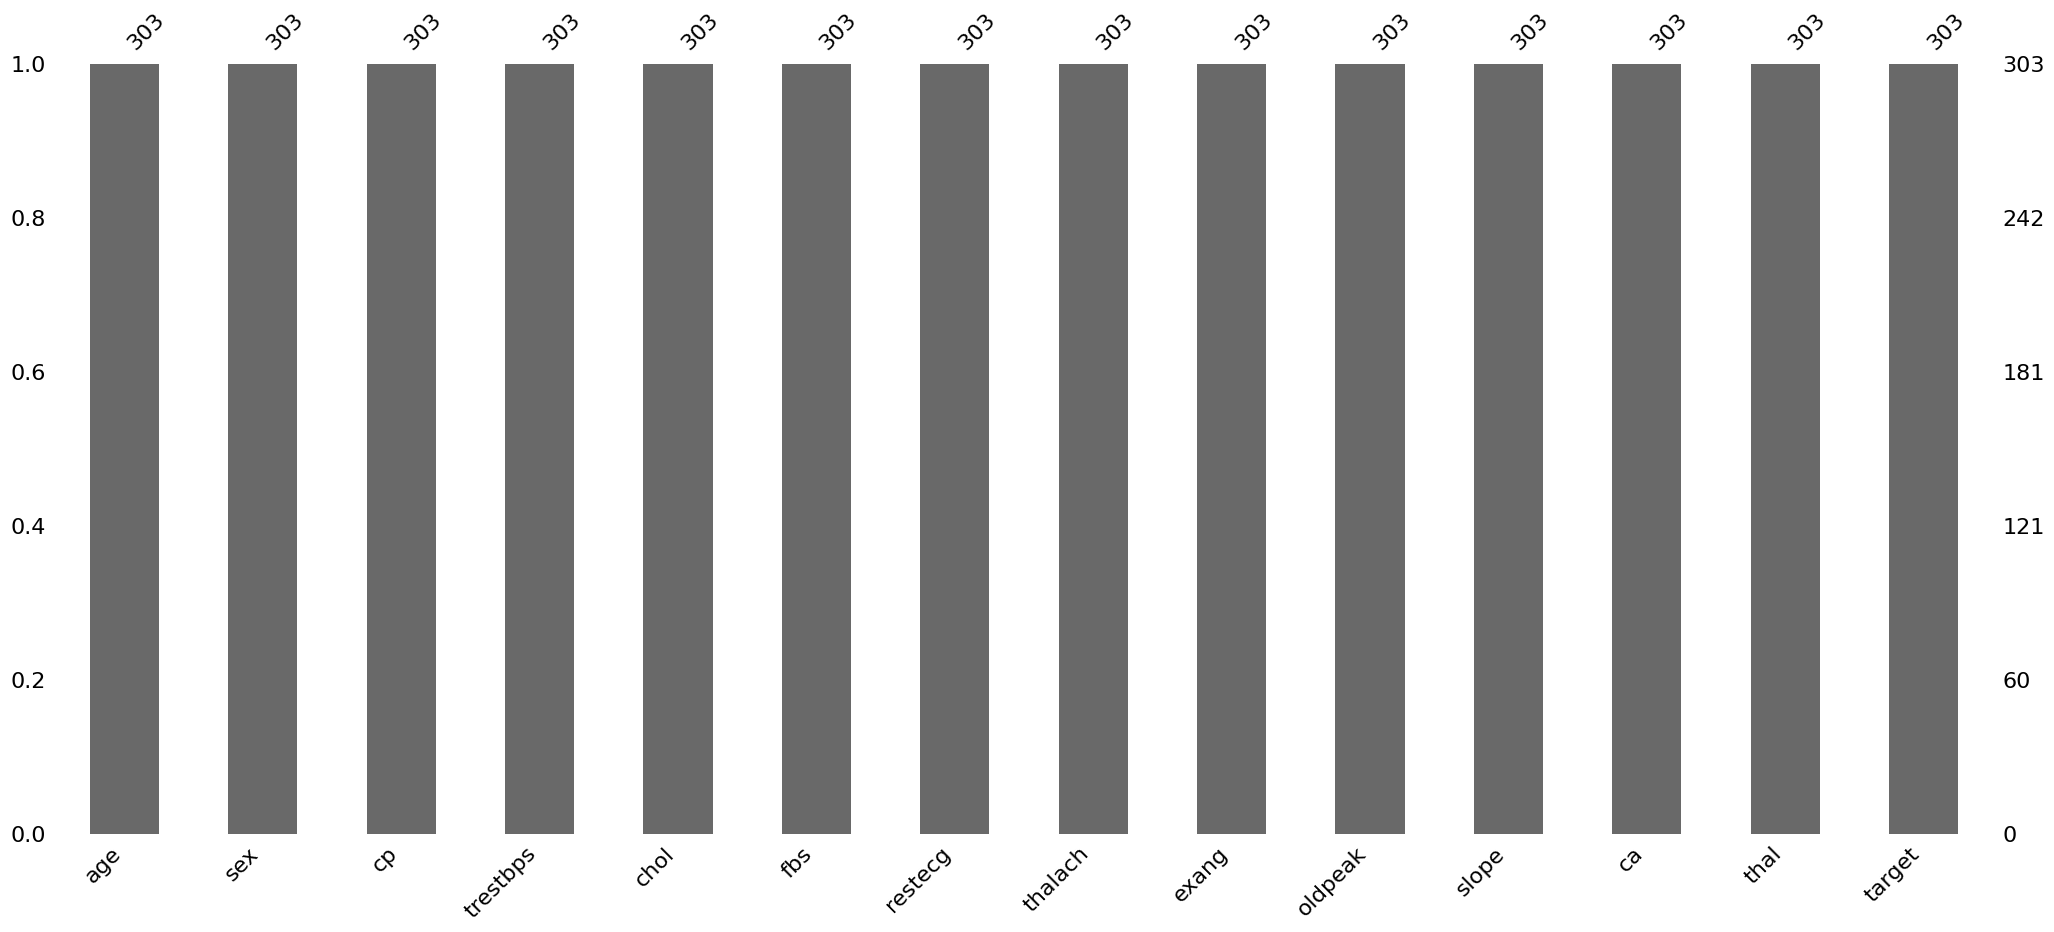

In [ ]:
plt.figure(figsize=(20,5))
msn.bar(df)
plt.show()

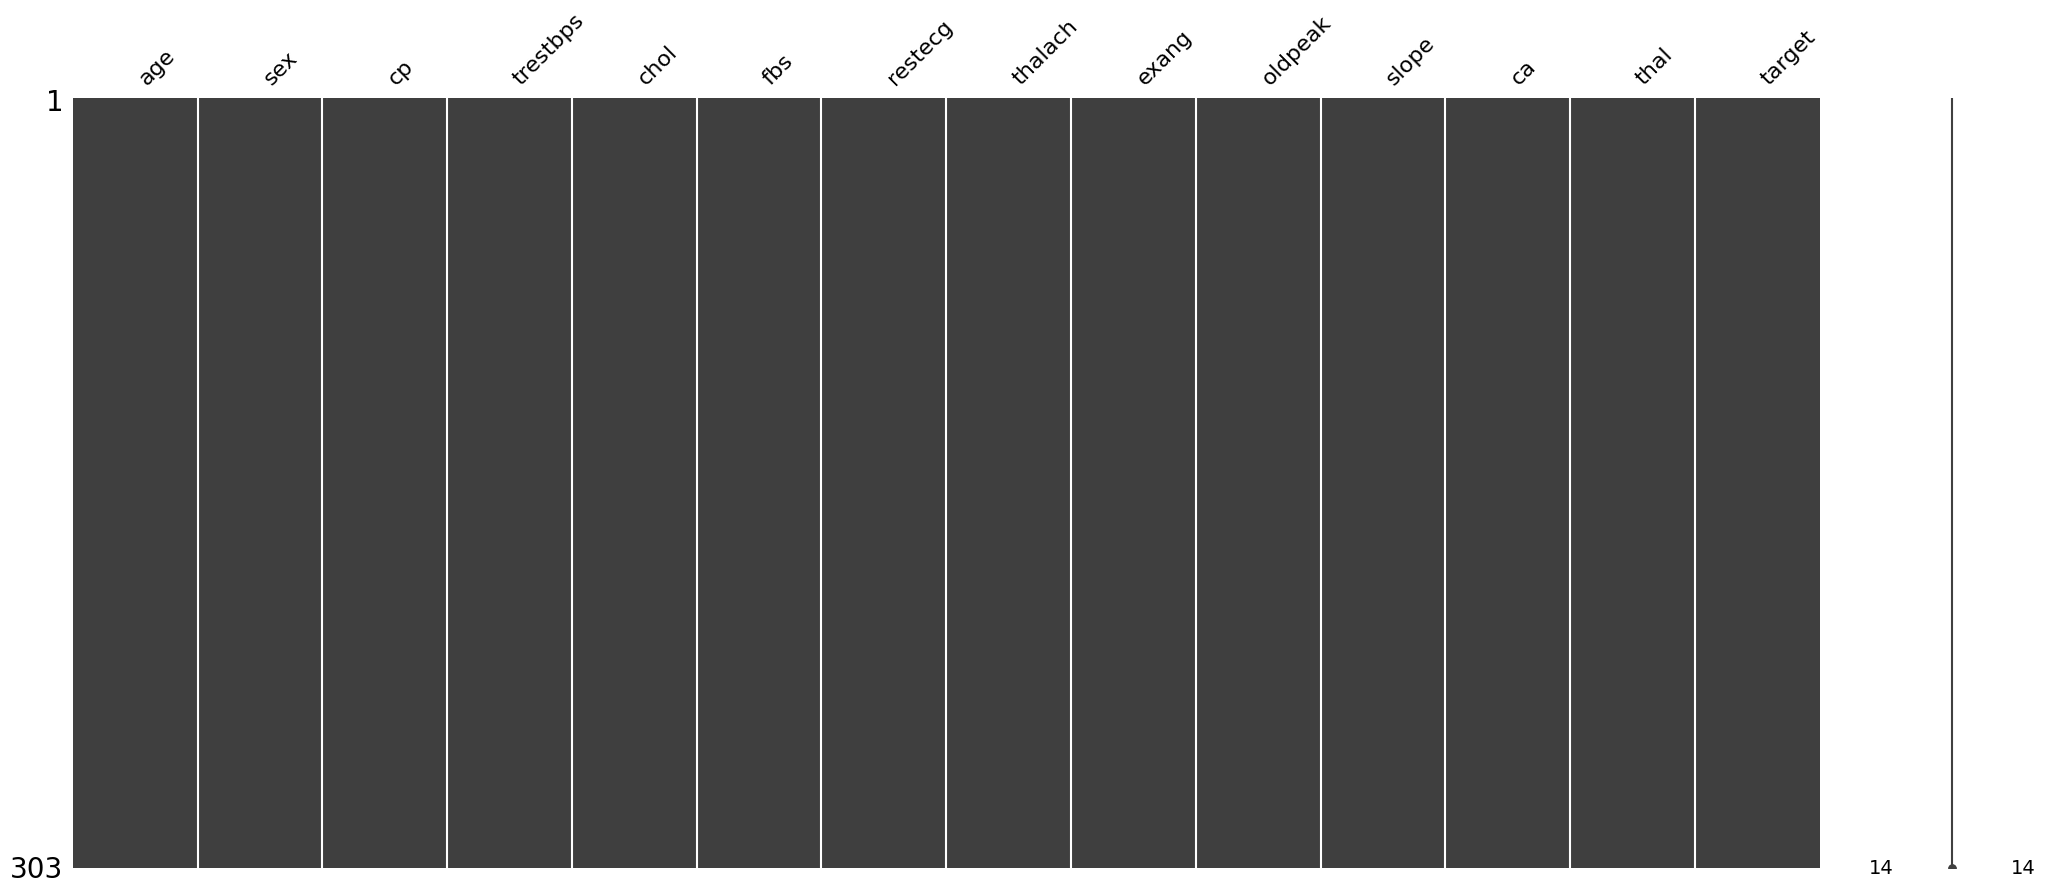

In [ ]:
msn.matrix(df)
plt.show()

In [ ]:
# Checking duplicate values


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## **Exploratory Data Analysis**

### Analyzing Target Variable

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

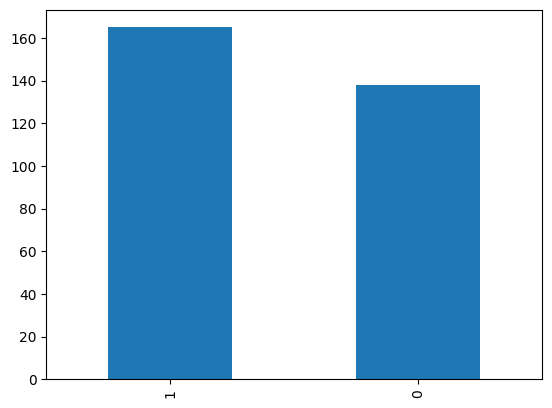

In [ ]:
df['target'].value_counts().plot(kind='bar')

In [ ]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

<Axes: xlabel='sex,target'>

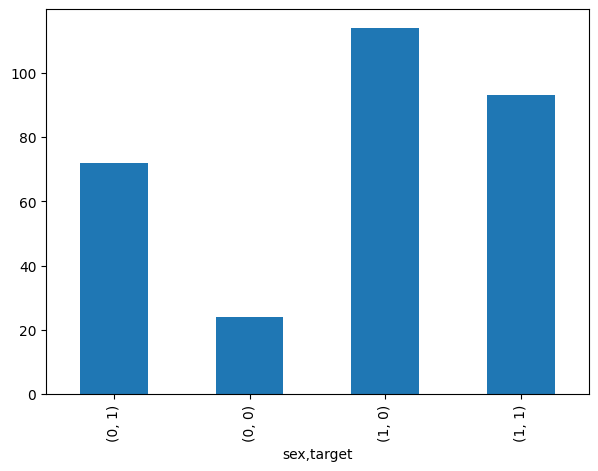

In [ ]:
plt.figure(figsize=(7,5))
df.groupby('(sex')['target)'].value_counts().plot(kind='bar')

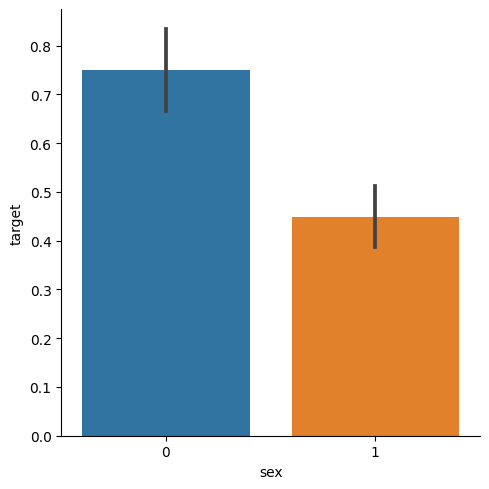

In [ ]:
sns.catplot(data=df,y='target',x='sex',kind='bar')
plt.show()

<Axes: xlabel='chol', ylabel='trestbps'>

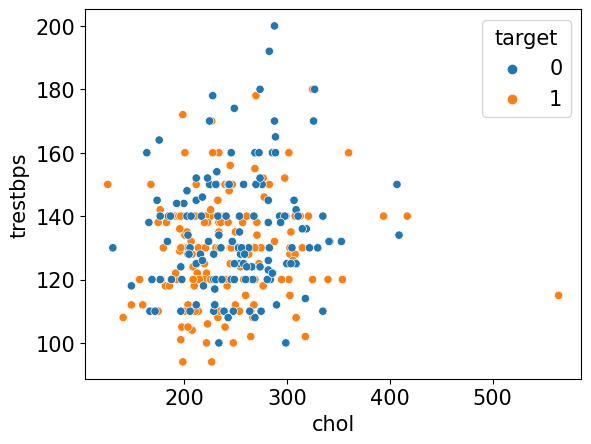

In [ ]:
plt.rcParams.update({'font.size': 15})
sns.scatterplot(data=df,y='trestbps',x='chol',hue='target')

<Axes: xlabel='chol', ylabel='trestbps'>

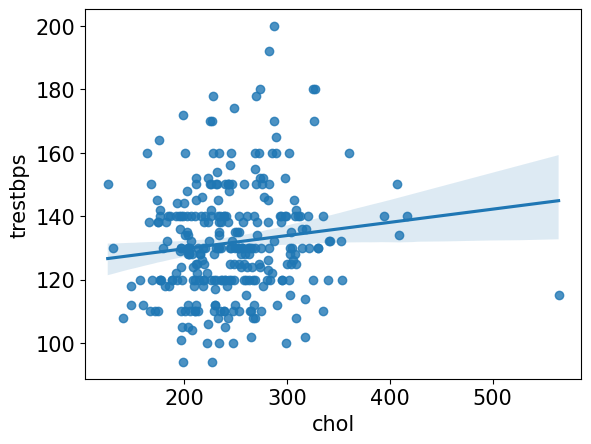

In [ ]:
sns.regplot(data=df,y='trestbps',x='chol')

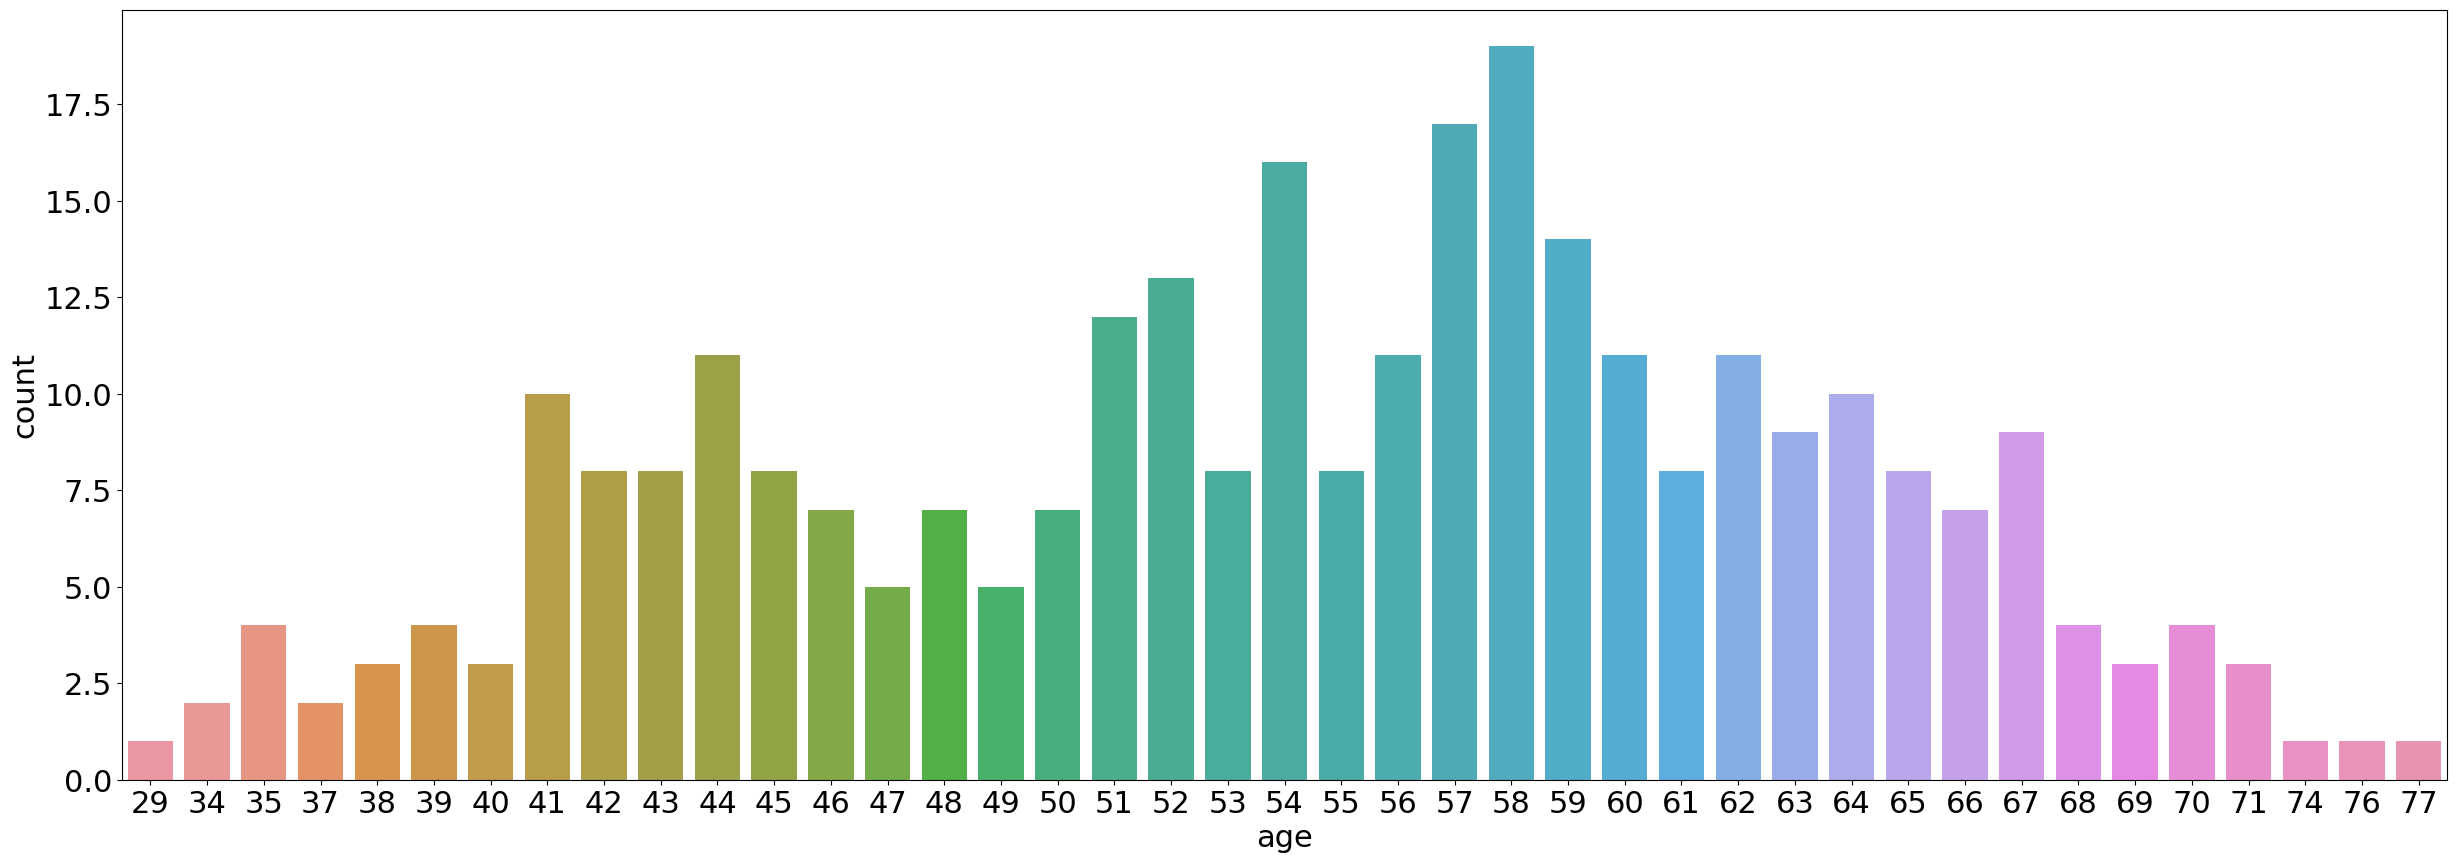

In [ ]:
plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 22})
sns.countplot(data=df,x='age',)
plt.show()

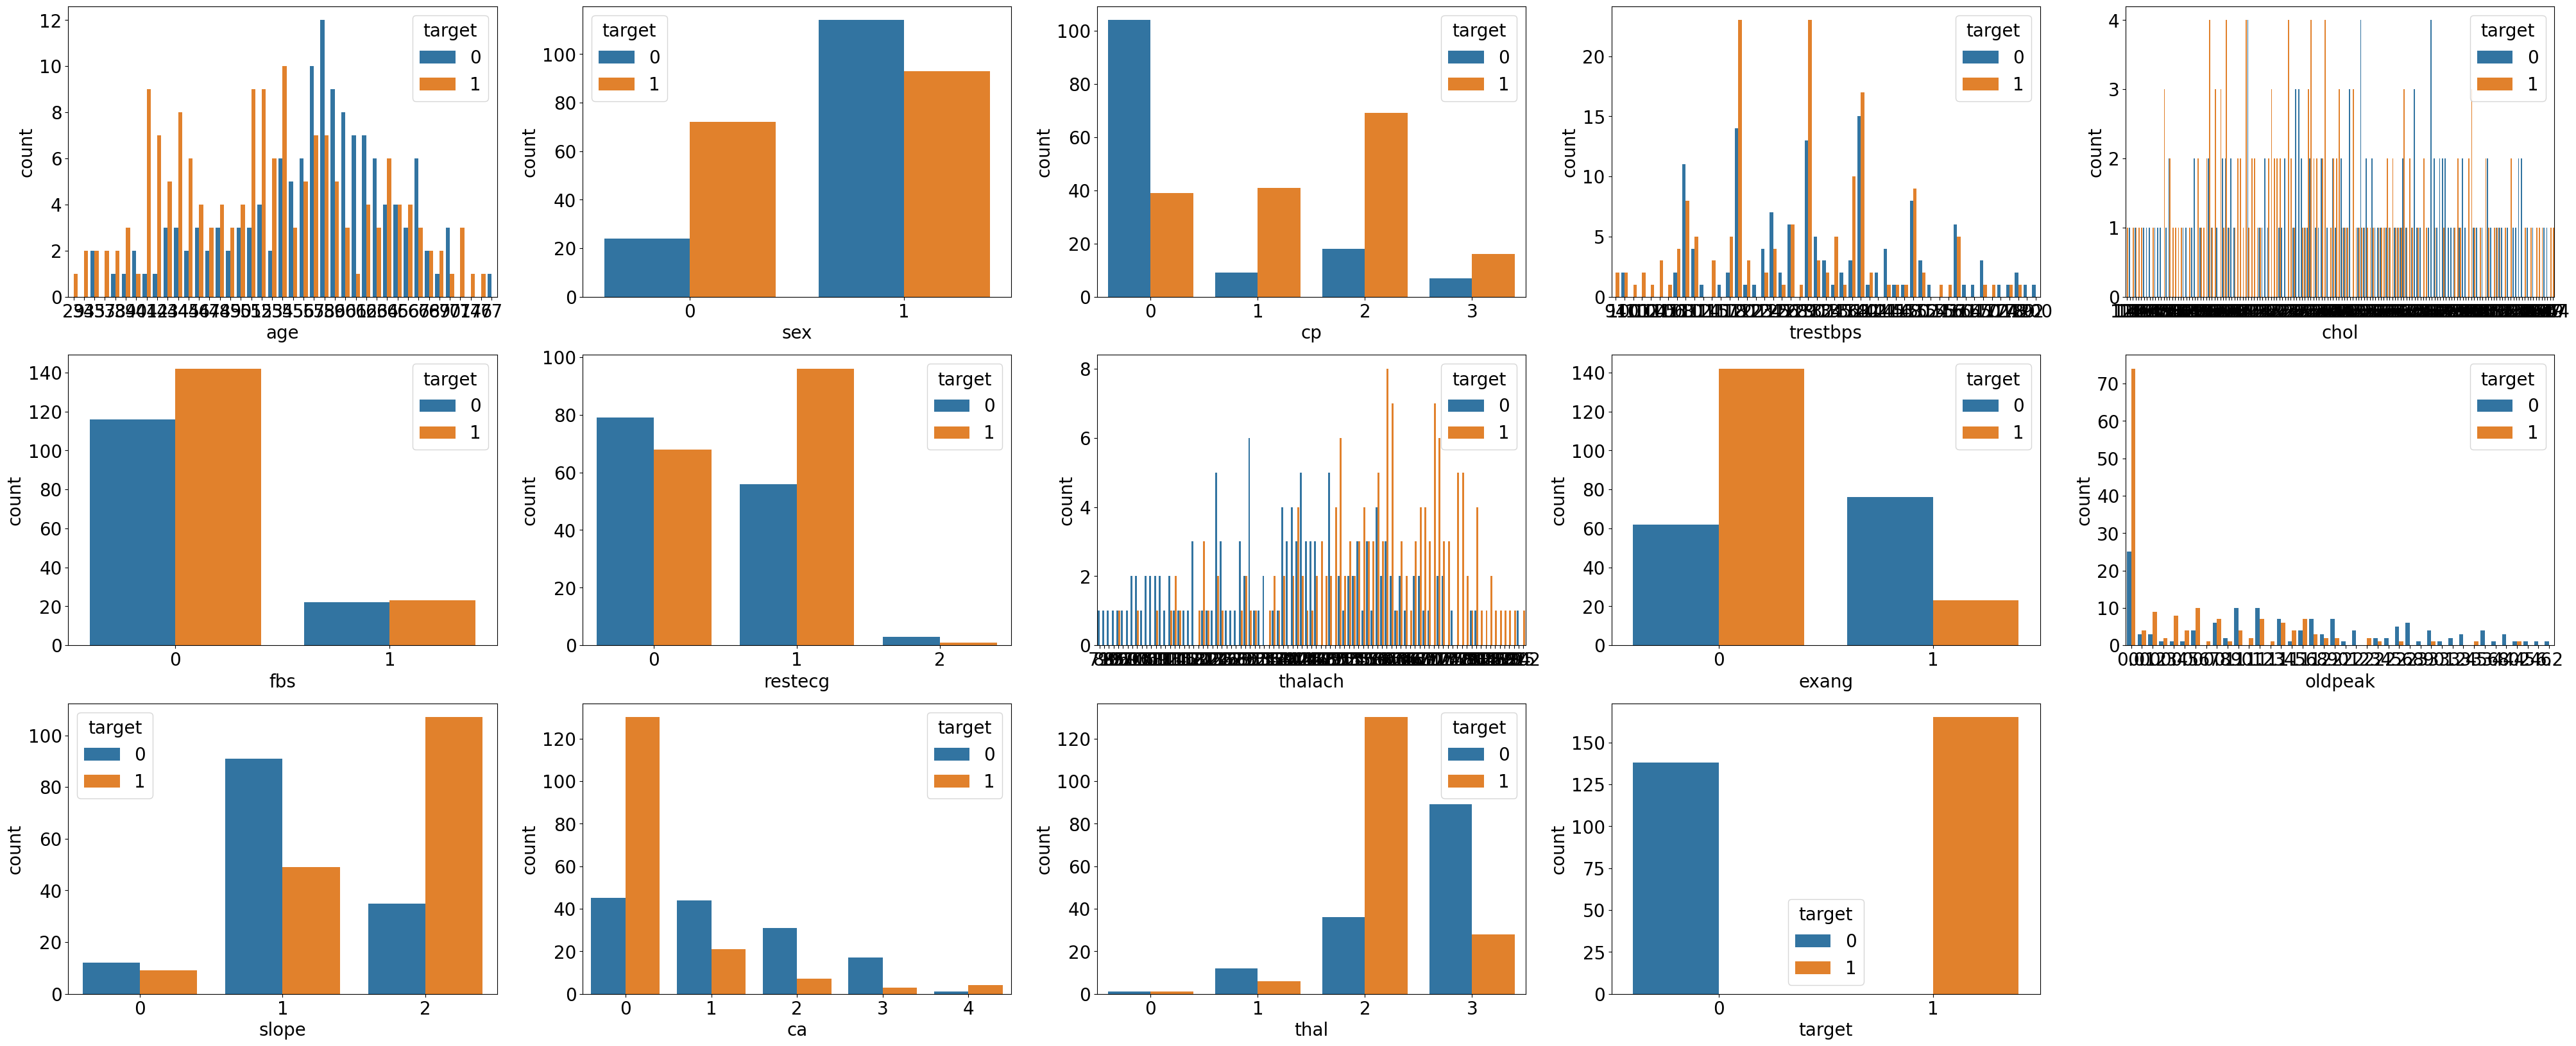

In [ ]:
plt.figure(figsize=(50,20))
plt.rcParams.update({'font.size': 20})
for i in enumerate(df.columns):
  plt.subplot(3,5,i[0]+1)
  sns.countplot(x=i[1],hue='target',data=df)

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

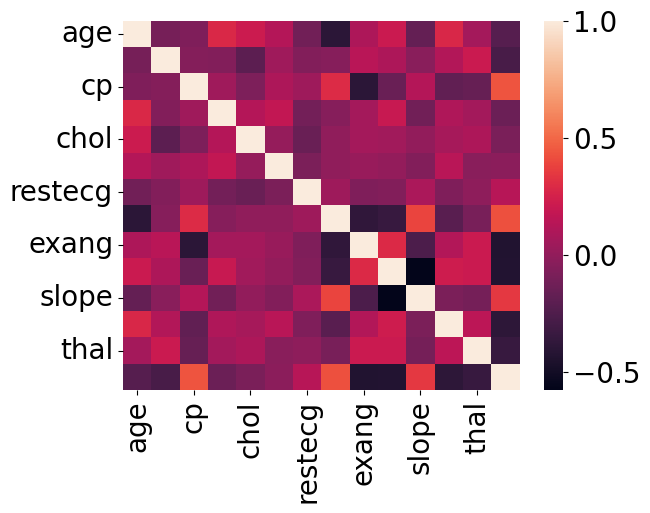

In [ ]:
sns.heatmap(df.corr())

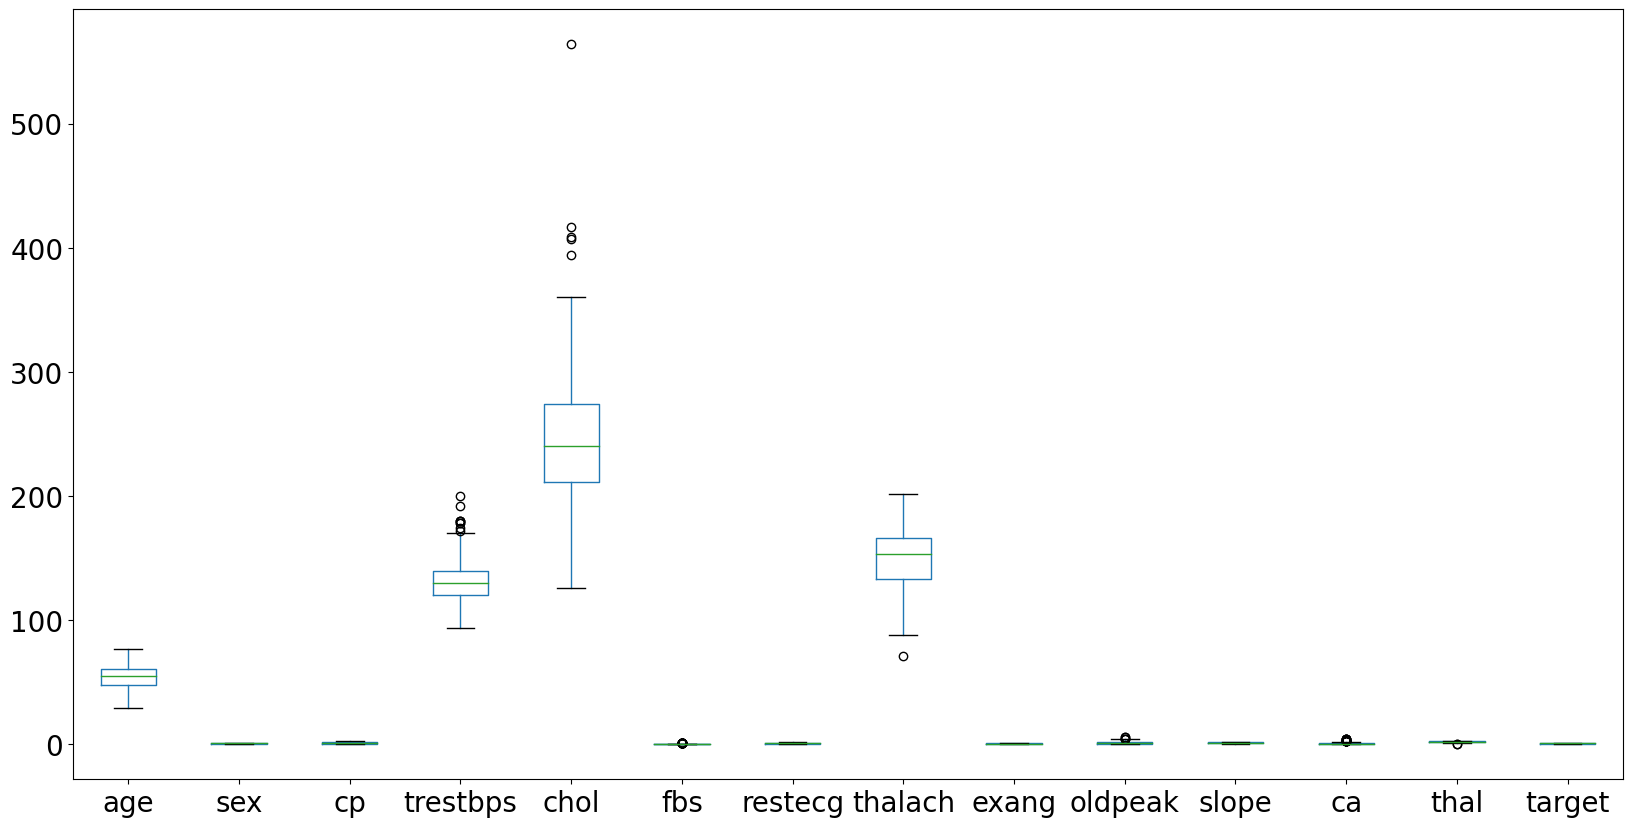

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot(grid=False)
plt.show()

<Figure size 2000x1000 with 0 Axes>

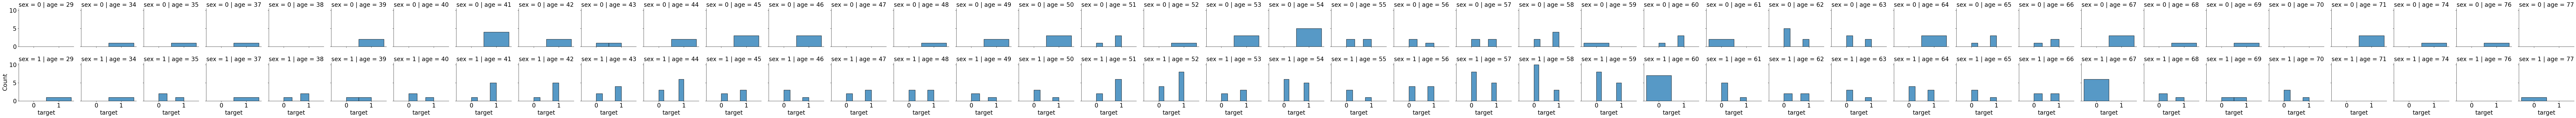

In [ ]:


plt.figure(figsize=(20,10))
g=sns.FacetGrid(df,row='sex',col='age')
g.map(sns.histplot,'target')
plt.show()

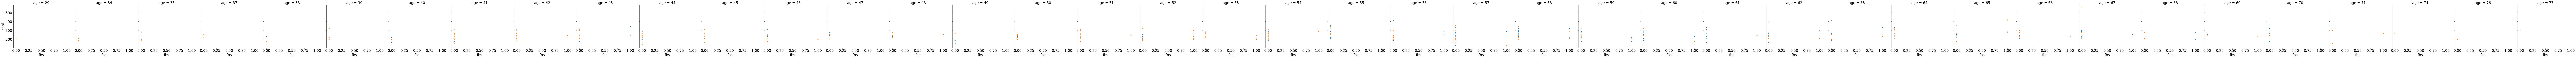

In [ ]:
g=sns.FacetGrid(df,hue='target',col='age',height=5)
g.map(sns.scatterplot,'fbs','chol')
plt.show()

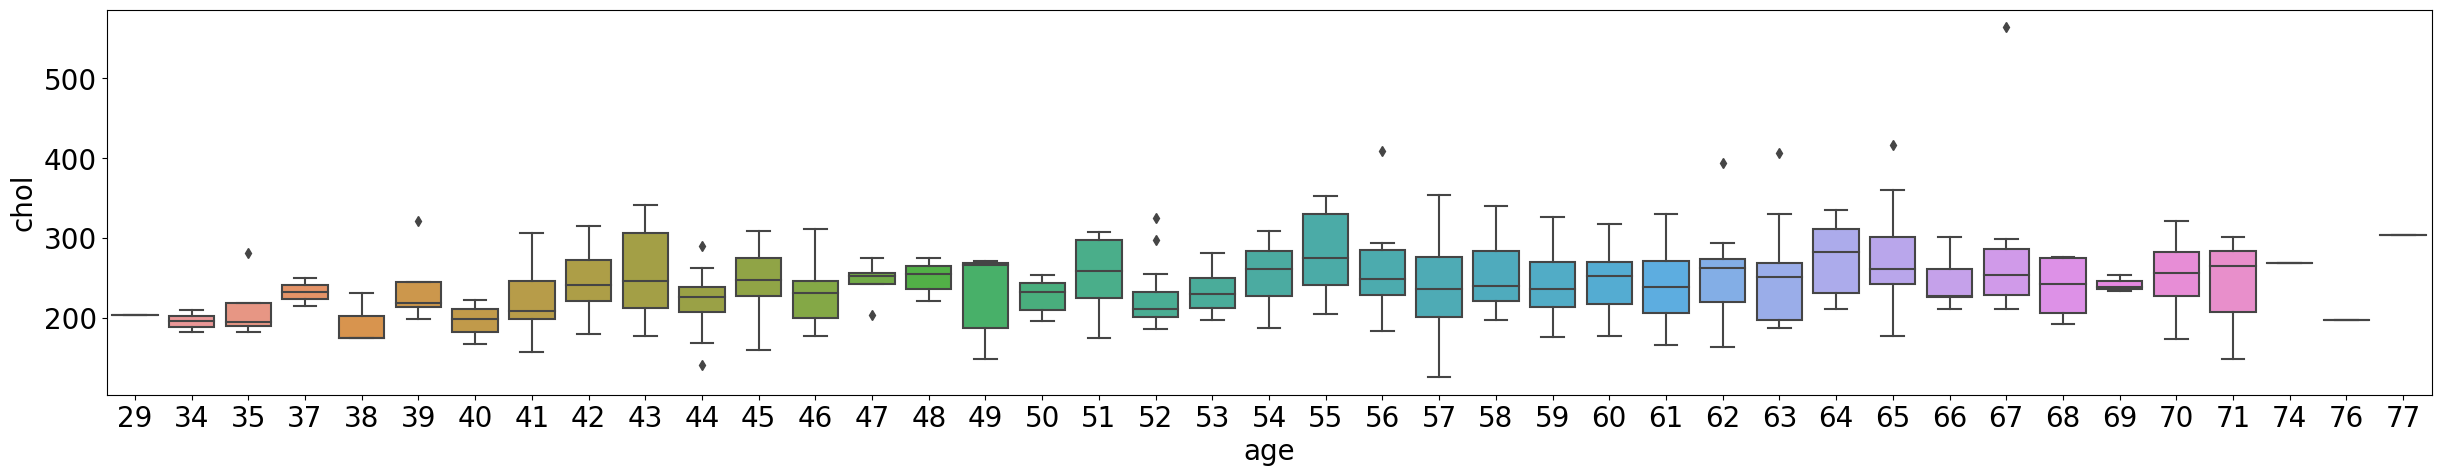

In [ ]:
fig,ax=plt.subplots(figsize=(30,5))
sns.boxplot(data=df,x='age',y='chol',ax=ax)
plt.show()

## **Splitting the dataset**

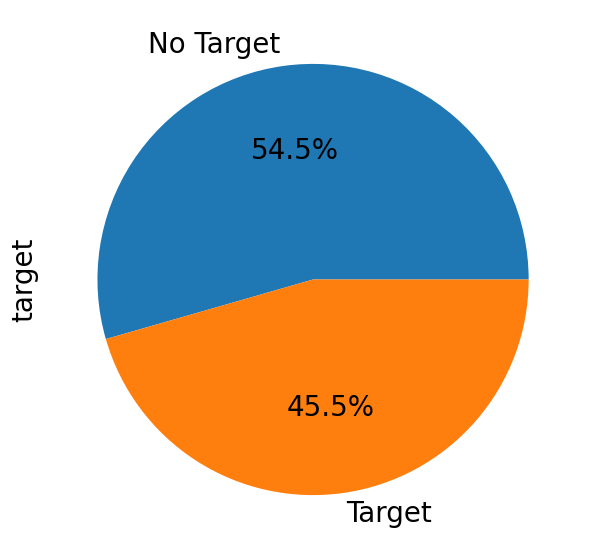

In [ ]:
plt.figure(figsize=(10,7))
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%',labels=['No Target','Target'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df2=df

In [ ]:
pred = df2.drop('target',axis=1)
target=df2['target']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(pred,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape

(242,)

In [ ]:
Y_test.shape

(61,)

In [ ]:
from sklearn.metrics import accuracy_score

# **Modelling and Predicting using ML**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
def train_model(X_train,y_train,X_test,y_test,classifier,**kwargs):
  model = classifier(**kwargs)

  # training the model
  model.fit(X_train,y_train)

  # check accuracy and print out the results
  fit_accuracy = model.score(X_train, y_train)
  test_accuracy = model.score(X_test, y_test)
  print(f"Train accuracy: {fit_accuracy:0.2%}")
  print(f"Test accuracy: {test_accuracy:0.2%}")
  return model

## **Logistic Regression**

In [ ]:
lr = LogisticRegression(random_state=7,max_iter=1000)

In [ ]:
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
round(lr.score(X_test,Y_test)*100,2)

85.25

In [ ]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test,y_pred_lr))
print(classification_report(Y_test,y_pred_lr))
print("Accuracy:",accuracy_score(Y_test, y_pred_lr))

[[21  6]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy: 0.8524590163934426


In [ ]:
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression, max_iter=1000)

Train accuracy: 83.88%
Test accuracy: 85.25%


### **Confusion Matrix**

<Axes: >

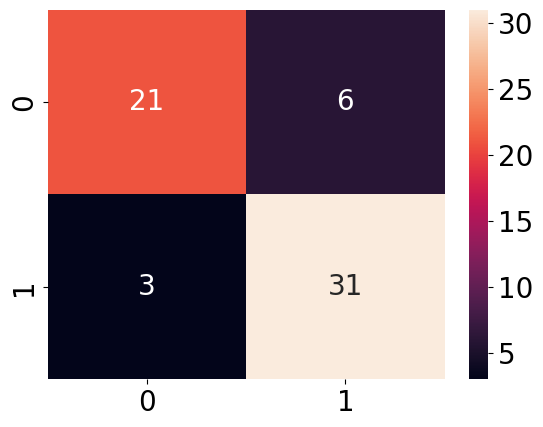

In [ ]:
matrix= confusion_matrix(Y_test, y_pred_lr)
sns.heatmap(matrix,annot = True, fmt = "d")


### **Precision Score**

In [ ]:
precision = precision_score(Y_test, y_pred_lr)
print("Precision: ",precision)

Precision:  0.8378378378378378


### **Recall Score**

In [ ]:
recall = recall_score(Y_test, y_pred_lr)
print("Recall is: ",recall)

Recall is:  0.9117647058823529


### **F Score**

In [ ]:
print((2*precision*recall)/(precision+recall))

0.8732394366197184


## **Random Forest**

In [ ]:
rf = RandomForestClassifier(max_depth=3,n_estimators=1000, random_state=0)

In [ ]:
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
rf_train=rf.score(X_train, Y_train)
rf_test=rf.score(X_test, Y_test)
print(rf_train)
print(rf_test)

0.8884297520661157
0.8524590163934426


In [ ]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)
score_rf

85.25

In [ ]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score

### **Confusion Matrix**

<Axes: >

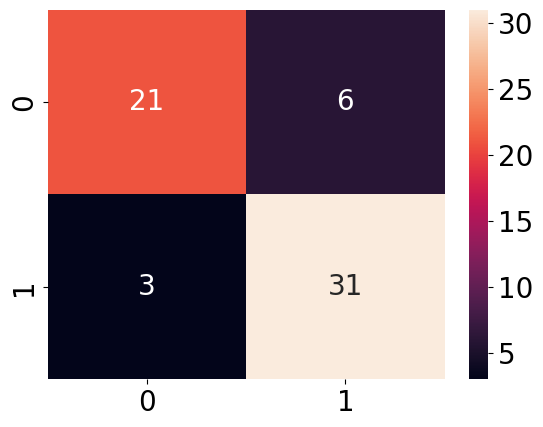

In [ ]:
matrix= confusion_matrix(Y_test, y_pred_rf)
sns.heatmap(matrix,annot = True, fmt = "d")


### **Precision Score**

In [ ]:
precision = precision_score(Y_test, y_pred_rf)
print("Precision: ",precision)

Precision:  0.8378378378378378


### **Recall Score**

In [ ]:
recall = recall_score(Y_test, y_pred_rf)
print("Recall is: ",recall)

Recall is:  0.9117647058823529


### **F Score**

In [ ]:
print((2*precision*recall)/(precision+recall))

0.8732394366197184


## **Naïve Bayes**

In [ ]:
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)
nb.fit(X_train, Y_train)
y_pred_nb = nb.predict(X_test)

Train accuracy: 83.47%
Test accuracy: 85.25%


In [ ]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)
score_nb

85.25

### **Confusion Matrix**

<Axes: >

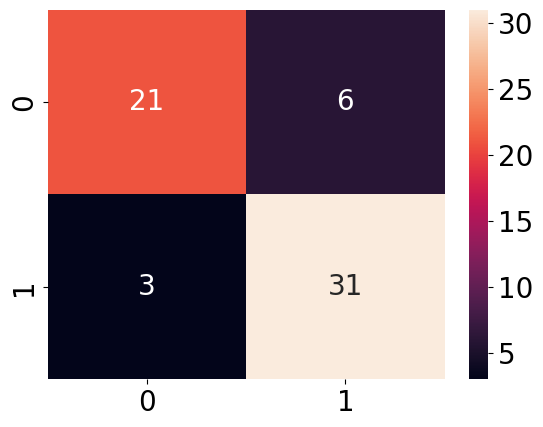

In [ ]:
matrix= confusion_matrix(Y_test, y_pred_nb)
sns.heatmap(matrix,annot = True, fmt = "d")


### **Precision Score**

In [ ]:
precision = precision_score(Y_test, y_pred_nb)
print("Precision: ",precision)

Precision:  0.8378378378378378


### **Recall Score**

In [ ]:
recall = recall_score(Y_test, y_pred_nb)
print("Recall is: ",recall)

Recall is:  0.9117647058823529


### **F Score**

In [ ]:
print((2*precision*recall)/(precision+recall))

0.8732394366197184


## **KNN (K Nearest Neighbors)**

In [ ]:
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)


Train accuracy: 71.90%
Test accuracy: 68.85%


In [ ]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)
score_knn

68.85

### **Confusion Matrix**

<Axes: >

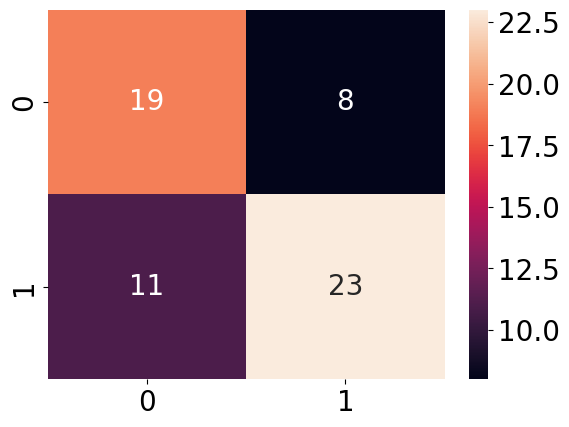

In [ ]:
matrix= confusion_matrix(Y_test, y_pred_knn)
sns.heatmap(matrix,annot = True, fmt = "d")

### **Precision Score**

In [ ]:
precision = precision_score(Y_test, y_pred_knn)
print("Precision: ",precision)

Precision:  0.7419354838709677


### **Recall Score**

In [ ]:
recall = recall_score(Y_test, y_pred_knn)

In [ ]:
print("Recall is: ",recall)

Recall is:  0.6764705882352942


### **F Score**

In [ ]:
print((2*precision*recall)/(precision+recall))

0.7076923076923077


## **Decision Tree**

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)


In [ ]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)
score_dt

81.97

In [ ]:
tree1 = DecisionTreeClassifier(max_depth=3,random_state=0)
tree1.fit(X_train, Y_train)
print("Train Accuracy: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Test Accuracy: {:.3f}".format(tree1.score(X_test, Y_test)))

Train Accuracy: 0.843
Test Accuracy: 0.820


### **Confusion Matrix**

<Axes: >

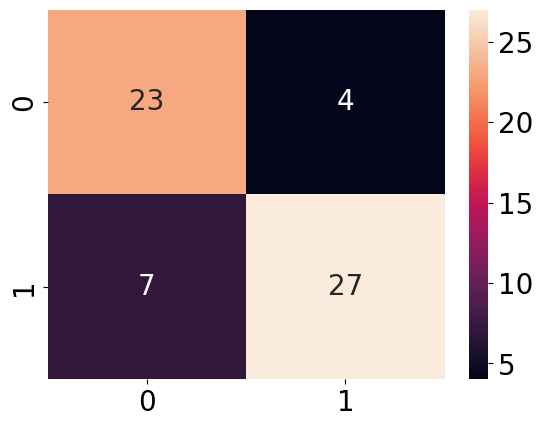

In [ ]:
matrix= confusion_matrix(Y_test, y_pred_dt)
sns.heatmap(matrix,annot = True, fmt = "d")

### **Precision Score**

In [ ]:
precision = precision_score(Y_test, y_pred_dt)
print("Precision: ",precision)

Precision:  0.8709677419354839


### **Recall Score**

In [ ]:
recall = recall_score(Y_test, y_pred_dt)

In [ ]:
print("Recall is: ",recall)

Recall is:  0.7941176470588235


### **F Score**

In [ ]:
print((2*precision*recall)/(precision+recall))

0.8307692307692308


## **Support Vector Machine**

In [ ]:
svm = SVC(random_state = 2).fit(X_train,Y_train)
svm.score(X_test,Y_test)
y_pred_svm = svm.predict(X_test)

In [ ]:
score_svm = round(accuracy_score(y_pred_svm,Y_test)*100,2)
score_svm

68.85

In [ ]:
params = {"C": [ 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [ 0.001, 0.1, 1, 5, 10 ,50 ,100]}
svm_model = SVC(random_state = 42)
svm_cv = GridSearchCV(svm_model,params,cv = 10,n_jobs = -1).fit(X_train,Y_train)
svm_cv.best_params_

{'C': 10, 'gamma': 0.001}

In [ ]:
svm_tuned = SVC(C = 10, degree = 1, gamma = 0.001,random_state=100).fit(X_train,Y_train)
svm_tuned.score(X_test,Y_test)

0.7049180327868853

In [ ]:
svm1 = SVC(random_state=0)
svm1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(svm1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(svm1.score(X_test, Y_test)))

Accuracy on training set: 0.665
Accuracy on test set: 0.689


In [ ]:
precision = precision_score(Y_test, y_pred_svm)
print("Precision: ",precision)

Precision:  0.6744186046511628


In [ ]:
recall = recall_score(Y_test, y_pred_svm)
print("Recall is: ",recall)

Recall is:  0.8529411764705882


In [ ]:
print((2*precision*recall)/(precision+recall))

0.7532467532467532


### **Confusion Matrix**

<Axes: >

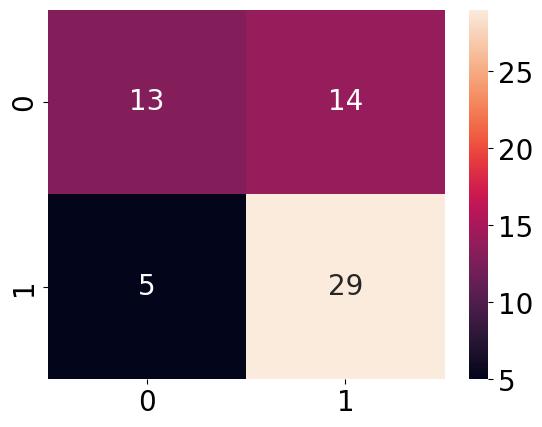

In [ ]:
matrix= confusion_matrix(Y_test, y_pred_svm)
sns.heatmap(matrix,annot = True, fmt = "d")

## **Gradient Boosting Machine**

In [ ]:
gbm = GradientBoostingClassifier(random_state = 42).fit(X_train,Y_train)
gbm.score(X_test,Y_test)
y_pred_gbm = gbm.predict(X_test)

In [ ]:
score_gbm = round(accuracy_score(y_pred_gbm,Y_test)*100,2)
score_gbm

80.33

In [ ]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,1000],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}
gbm_model = GradientBoostingClassifier(random_state = 42)
gbm_cv = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1).fit(X_train,Y_train)
gbm_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
gbm_tuned = GradientBoostingClassifier(max_depth = 2, learning_rate = 0.01, min_samples_split = 2, n_estimators = 100, random_state = 42).fit(X_train,Y_train)
gbm_tuned.score(X_test,Y_test)

0.8360655737704918

In [ ]:
gbc = GradientBoostingClassifier(max_depth=2, random_state=0)
gbc.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(gbc.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(gbc.score(X_test, Y_test)))

Accuracy on training set: 0.938
Accuracy on test set: 0.836


### **Confusion Matrix**

<Axes: >

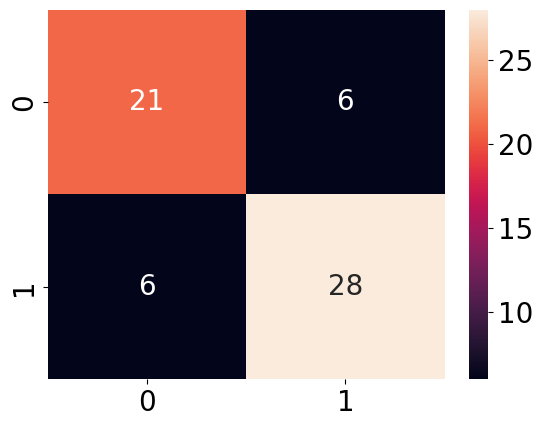

In [ ]:
y_pred_gbm = gbm.predict(X_test)
sns.heatmap(confusion_matrix(Y_test,y_pred_gbm),annot = True)


### **Precision Score**

In [ ]:
precision = precision_score(Y_test, y_pred_gbm)
print("Precision: ",precision)

Precision:  0.8235294117647058


### **Recall Score**

In [ ]:
recall = recall_score(Y_test, y_pred_gbm)

In [ ]:
print("Recall is: ",recall)

Recall is:  0.8235294117647058


### **F Score**

In [ ]:
print((2*precision*recall)/(precision+recall))

0.8235294117647058


## **AdaBoost**

In [ ]:
ada = AdaBoostClassifier(random_state = 42).fit(X_train,Y_train)
ada.score(X_test,Y_test)

0.9016393442622951

In [ ]:
params = {"n_estimators":[10,100,200,300,500,1000],"learning_rate":[0.0001,0.001,0.01,0.1,0.2,0.3,0.7]}
ada_model = AdaBoostClassifier(random_state = 42)
ada_cv = GridSearchCV(ada_model,params,cv = 10,n_jobs = -1).fit(X_train,Y_train)
ada_cv.best_params_

{'learning_rate': 0.01, 'n_estimators': 300}

In [ ]:
ada_tuned = AdaBoostClassifier(learning_rate = 0.01,n_estimators = 300,random_state = 42).fit(X_train,Y_train)
ada_tuned.score(X_test,Y_test)

0.8524590163934426

In [ ]:
abc = AdaBoostClassifier(random_state=0)
abc.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(abc.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(abc.score(X_test, Y_test)))

Accuracy on training set: 0.921
Accuracy on test set: 0.902


### **Confusion Matrix**

<Axes: >

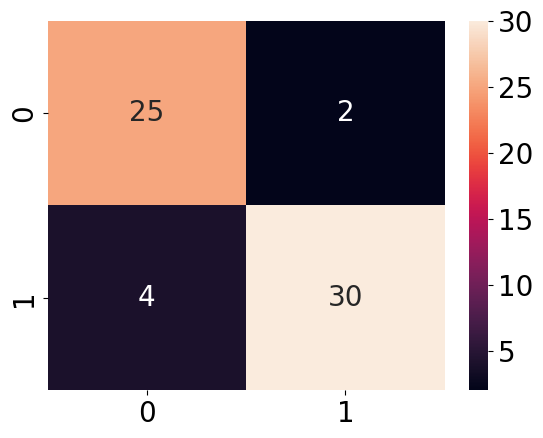

In [ ]:
y_pred_abc = abc.predict(X_test)
sns.heatmap(confusion_matrix(Y_test,y_pred_abc),annot = True)


In [ ]:
score_abc = round(accuracy_score(y_pred_abc,Y_test)*100,2)
score_abc

90.16

### **Precision Score**

In [ ]:
precision = precision_score(Y_test, y_pred_abc)
print("Precision: ",precision)

Precision:  0.9375


### **Recall Score**

In [ ]:
recall = recall_score(Y_test, y_pred_abc)

In [ ]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706


### **F Score**

In [ ]:
print((2*precision*recall)/(precision+recall))

0.9090909090909091


## **Bagging**

In [ ]:
bag = BaggingClassifier(random_state = 42).fit(X_train,Y_train)
bag.score(X_test,Y_test)


0.8032786885245902

In [ ]:
params = {"n_estimators": range(1,50)}
bag_model = BaggingClassifier(random_state = 42)
bag_cv = GridSearchCV(bag_model, params, cv = 10, n_jobs = -1).fit(X_train,Y_train)
bag_cv.best_params_

{'n_estimators': 45}

In [ ]:
bag_tuned = BaggingClassifier(n_estimators = 45,random_state =0).fit(X_train,Y_train)
bag_tuned.score(X_test,Y_test)

0.8524590163934426

In [ ]:
bag = GradientBoostingClassifier(max_depth=2, random_state=42)
bag.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(bag.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(bag.score(X_test, Y_test)))

Accuracy on training set: 0.938
Accuracy on test set: 0.836


### **Confusion Matrix**

<Axes: >

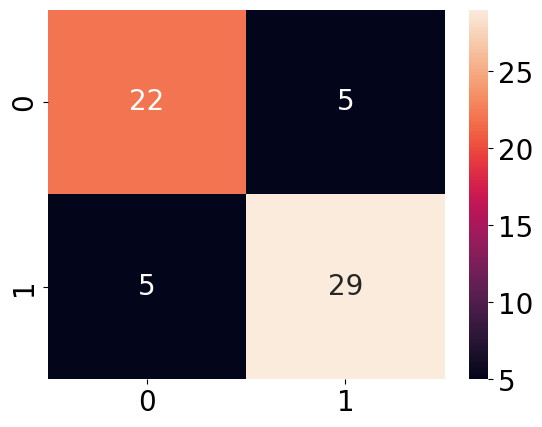

In [ ]:
y_pred_bag = bag.predict(X_test)
sns.heatmap(confusion_matrix(Y_test,y_pred_bag),annot = True)


In [ ]:
score_bag = round(accuracy_score(y_pred_bag,Y_test)*100,2)
score_bag

83.61

### **Precision Score**

In [ ]:
precision = precision_score(Y_test, y_pred_bag)
print("Precision: ",precision)

Precision:  0.8529411764705882


### **Recall Score**

In [ ]:
recall = recall_score(Y_test, y_pred_bag)

In [ ]:
print("Recall is: ",recall)

Recall is:  0.8529411764705882


### **F Score**

In [ ]:
print((2*precision*recall)/(precision+recall))

0.8529411764705882
